In [1]:
def f1(x,y):
  y1 = (2-2*x*y)/(x*x+1)
  return y1
def f2(x,y):
  y2 = y*y/(1+x)
  return y2
def f3(x,y):
  y3 = (y*y+y)/x
  return y3
def f4(x,y):
  y4 = -x*y+(4*x/y)
  return y4

In [2]:
import math
def y1(x):
  return (2*x+1)/(x*x+1)
def y2(x):
  return -1/math.log(x+1)
def y3(x):
  return 2*x/(1-2*x)
def y4(x):
  return math.sqrt(4-3*math.exp(-x*x))

In [3]:
def explicit(h,f,x,y):
  P1 = h*f(x,y)
  P2 = h*f(x+(h/2),y+(P1/2))
  P3 = h*f(x+(h/2),y+(P2/2))
  P4 = h*f(x+h,y+P3)
  y_new = y + (P1+2*P2+2*P3+P4)/6
  return y_new

In [4]:
def implicit(h,f,x,y):
  y_old = y
  error = 10
  y_new = y_old + 10
  accuracy = 0.001
  while (error>accuracy):
    y_iter = y_old + h*f(x,y_new)
    error = abs(y_new-y_iter)
    y_new = y_iter
  return y_new

In [5]:
def ODE(ti,tf,h,y0,f):
  t = ti
  ye,yi = y0,y0
  ye_data = [ye]
  yi_data = [yi]
  while (t<tf):
    ye_new = explicit(h,f,t,ye)
    ye_data.append(ye_new)
    yi_new = implicit(h,f,t,yi)
    yi_data.append(yi_new)
    t = t + h
    ye,yi = ye_new,yi_new
  return ye_data,yi_data

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

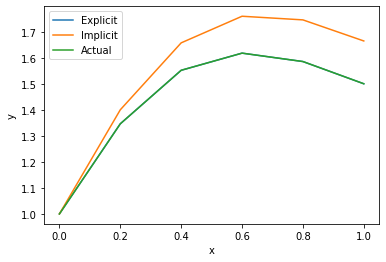

In [7]:
# h = 0.2
y1e,y1i=ODE(0,1,0.2,1,f1)
x = np.arange(0,1.2,0.2)
y = [y1(i) for i in x]
ee1 = [x1 - x2 for (x1, x2) in zip(y1e,y)]
ei1 = [x1 - x2 for (x1, x2) in zip(y1i,y)]
plt.plot(x,y1e)
plt.plot(x,y1i)
plt.plot(x,y)
plt.legend(['Explicit','Implicit','Actual'])
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

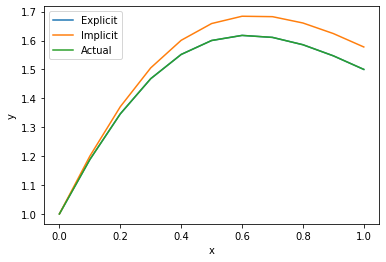

In [8]:
# h = 0.1
y1e,y1i=ODE(0,1,0.1,1,f1)
x = np.arange(0,1.1,0.1)
y = [y1(i) for i in x]
ee2 = [x1 - x2 for (x1, x2) in zip(y1e,y)]
ei2 = [x1 - x2 for (x1, x2) in zip(y1i,y)]
plt.plot(x,y1e[:-1])
plt.plot(x,y1i[:-1])
plt.plot(x,y)
plt.legend(['Explicit','Implicit','Actual'])
plt.xlabel('x')
plt.ylabel('y')
# Doubt: From where does an extra value come in ode solution for h=0.1 only?

Text(0, 0.5, 'y')

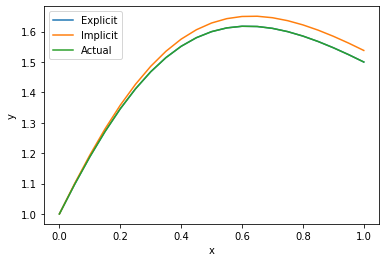

In [9]:
# h = 0.05
y1e,y1i=ODE(0,1,0.05,1,f1)
x = np.arange(0,1.05,0.05)
y = [y1(i) for i in x]
ee3 = [x1 - x2 for (x1, x2) in zip(y1e,y)]
ei3 = [x1 - x2 for (x1, x2) in zip(y1i,y)]
plt.plot(x,y1e)
plt.plot(x,y1i)
plt.plot(x,y)
plt.legend(['Explicit','Implicit','Actual'])
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

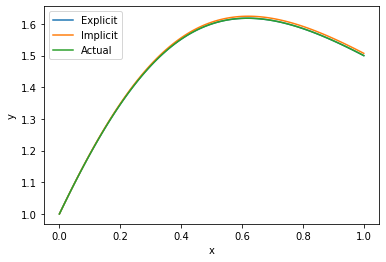

In [10]:
# h = 0.01
y1e,y1i=ODE(0,1,0.01,1,f1)
x = np.arange(0,1.01,0.01)
y = [y1(i) for i in x]
ee4 = [x1 - x2 for (x1, x2) in zip(y1e,y)]
ei4 = [x1 - x2 for (x1, x2) in zip(y1i,y)]
plt.plot(x,y1e)
plt.plot(x,y1i)
plt.plot(x,y)
plt.legend(['Explicit','Implicit','Actual'])
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

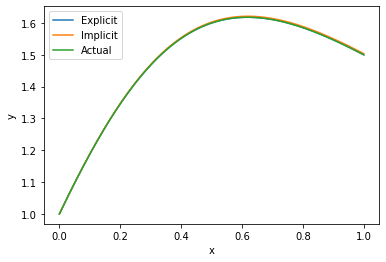

In [11]:
# h = 0.005
y1e,y1i=ODE(0,1,0.005,1,f1)
x = np.arange(0,1.005,0.005)
y = [y1(i) for i in x]
ee5 = [x1 - x2 for (x1, x2) in zip(y1e,y)]
ei5 = [x1 - x2 for (x1, x2) in zip(y1i,y)]
plt.plot(x,y1e)
plt.plot(x,y1i)
plt.plot(x,y)
plt.legend(['Explicit','Implicit','Actual'])
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'L2-Norm Error')

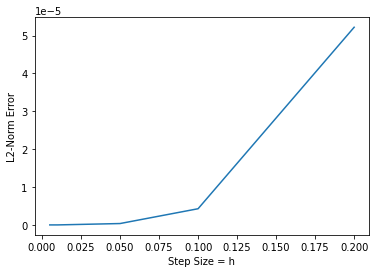

In [12]:
# Explicit
e1 = np.linalg.norm(ee1,2)
e2 = np.linalg.norm(ee2,2)
e3 = np.linalg.norm(ee3,2)
e4 = np.linalg.norm(ee4,2)
e5 = np.linalg.norm(ee5,2)
e = [e1,e2,e3,e4,e5]
h = [0.2,0.1,0.05,0.01,0.005]
plt.plot(h,e)
plt.xlabel('Step Size = h')
plt.ylabel('L2-Norm Error')

Text(0, 0.5, 'L2-Norm Error')

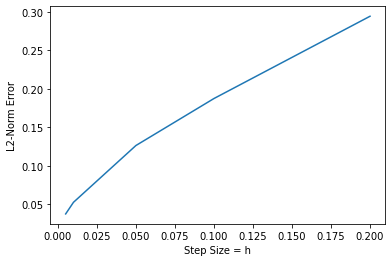

In [13]:
# Implicit
e1 = np.linalg.norm(ei1,2)
e2 = np.linalg.norm(ei2,2)
e3 = np.linalg.norm(ei3,2)
e4 = np.linalg.norm(ei4,2)
e5 = np.linalg.norm(ei5,2)
e = [e1,e2,e3,e4,e5]
h = [0.2,0.1,0.05,0.01,0.005]
plt.plot(h,e)
plt.xlabel('Step Size = h')
plt.ylabel('L2-Norm Error')